In [23]:
import pandas as pd
import numpy as np

In [24]:
first = pd.read_csv('data/전국_평균_분양가격(2013년_9월부터_2015년_8월까지).csv', encoding='cp949')

In [25]:
first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [5]:
last = pd.read_csv('data/주택도시보증공사_전국_평균_분양가격(2019년_12월).csv',encoding='cp949')

In [6]:
last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [7]:
last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [8]:
# last[' 분양가격(㎡)'].astype(float) value error '   '

In [9]:
last['분양가격'] = pd.to_numeric(last['분양가격(㎡)'], errors='coerce')

In [10]:
last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
분양가격       378
dtype: int64

In [11]:
last['평당분양가격'] = last['분양가격'] * 3.3

In [12]:
last['분양가격(㎡)'].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [13]:
last['분양가격'].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [14]:
# 유일값 개수 뽑아내는 함수 nunique()
last['규모구분'].nunique()

5

In [26]:
# 유일값 뽑아내는 함수 unique()
last['규모구분'].unique()

KeyError: '규모구분'

In [16]:
# 전용 면적은 제거, 초과는 ~, 이하는 제거
last['전용면적'] = last['규모구분'].str.replace('전용면적','')
last['전용면적'].str.replace('초과','~')
last['전용면적'].str.replace('이하','').str.strip()

0               전체
1              60㎡
2        60㎡초과 85㎡
3       85㎡초과 102㎡
4           102㎡초과
           ...    
4330            전체
4331           60㎡
4332     60㎡초과 85㎡
4333    85㎡초과 102㎡
4334        102㎡초과
Name: 전용면적, Length: 4335, dtype: object

In [17]:
# 필요없는 컬럼 ('규모구분','분양가격(㎡)' 제거 )
last.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격', '전용면적'], dtype='object')

In [18]:
last.info() # 271.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [19]:
last.drop(columns = ['규모구분','분양가격(㎡)'],axis=1,inplace=True)

In [20]:
last.info() # 203.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


In [21]:
last.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [29]:
last[last['전용면적']=='전체'].groupby(['지역명'])['평당분양가격'].mean()

AttributeError: 'list' object has no attribute 'groupby'

In [28]:
last.groupby(['전용면적', '지역명'])['평당분양가격'].mean().to_frame().reset_index()

,전용면적,지역명,평당분양가격
0,102㎡초과,강원,8311.380000
1,102㎡초과,경기,14771.790000
2,102㎡초과,경남,10358.363265
3,102㎡초과,경북,9157.302000
4,102㎡초과,광주,11041.532432
...,...,...,...
80,전체,전남,7283.562000
81,전체,전북,7292.604000
82,전체,제주,10784.994000
83,전체,충남,7815.324000


In [34]:
last.groupby(['전용면적', '지역명'])['평당분양가격'].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡초과,8311.380000,14771.790,10358.363265,9157.302000,11041.532432,13087.338000,14876.871429,13208.250,23446.038,10106.976000,9974.448000,14362.030435,8168.4900,8193.57000,10522.787234,8689.169388,8195.352
60㎡이하,7567.098000,13251.744,8689.175000,7883.172000,9430.666667,11992.068000,9176.475000,11353.782,23212.794,9323.927027,9202.106897,11241.318000,7210.1700,7609.93200,14022.221053,7911.156000,7103.118
60㎡초과 85㎡이하,7485.588000,12523.566,8618.676000,8061.372000,9910.692000,11778.690000,9711.372000,11864.820,22786.830,9775.458000,10502.531707,11384.406000,7269.2400,7271.35200,10621.314000,7818.954000,7264.488
85㎡초과 102㎡이하,8749.557143,13677.774,10017.612000,8773.814634,9296.100000,11140.642857,9037.430769,12072.588,25943.874,9847.926000,8861.007692,11527.560000,7908.8625,8275.78125,10709.082353,9120.045000,8391.306
전체,7477.536000,12559.602,8658.672000,8078.532000,9903.630000,11771.298000,9786.018000,11936.166,22610.346,9805.422000,10492.712195,11257.026000,7283.5620,7292.60400,10784.994000,7815.324000,7219.014


In [35]:
last.groupby(['전용면적', '지역명'])['평당분양가격'].mean().unstack().transpose()

전용면적,102㎡초과,60㎡이하,60㎡초과 85㎡이하,85㎡초과 102㎡이하,전체
지역명,,,,,
강원,8311.380000,7567.098000,7485.588000,8749.557143,7477.536000
경기,14771.790000,13251.744000,12523.566000,13677.774000,12559.602000
경남,10358.363265,8689.175000,8618.676000,10017.612000,8658.672000
경북,9157.302000,7883.172000,8061.372000,8773.814634,8078.532000
광주,11041.532432,9430.666667,9910.692000,9296.100000,9903.630000
대구,13087.338000,11992.068000,11778.690000,11140.642857,11771.298000
대전,14876.871429,9176.475000,9711.372000,9037.430769,9786.018000
부산,13208.250000,11353.782000,11864.820000,12072.588000,11936.166000
서울,23446.038000,23212.794000,22786.830000,25943.874000,22610.346000


In [33]:
last.groupby(['전용면적', '지역명'])['평당분양가격'].mean().unstack().T

전용면적,102㎡초과,60㎡이하,60㎡초과 85㎡이하,85㎡초과 102㎡이하,전체
지역명,,,,,
강원,8311.380000,7567.098000,7485.588000,8749.557143,7477.536000
경기,14771.790000,13251.744000,12523.566000,13677.774000,12559.602000
경남,10358.363265,8689.175000,8618.676000,10017.612000,8658.672000
경북,9157.302000,7883.172000,8061.372000,8773.814634,8078.532000
광주,11041.532432,9430.666667,9910.692000,9296.100000,9903.630000
대구,13087.338000,11992.068000,11778.690000,11140.642857,11771.298000
대전,14876.871429,9176.475000,9711.372000,9037.430769,9786.018000
부산,13208.250000,11353.782000,11864.820000,12072.588000,11936.166000
서울,23446.038000,23212.794000,22786.830000,25943.874000,22610.346000


In [36]:
last.groupby(['전용면적', '지역명'])['평당분양가격'].mean().unstack(level=1).round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡초과,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡이하,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡초과 85㎡이하,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡초과 102㎡이하,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [44]:
# 연도별 지역별 평당분양가격
avg_last = last.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack(level=0)

In [46]:
# 지역별 평당 분양가격 평균
last.pivot_table(index='지역명', values='평당분양가격', aggfunc='mean')

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [47]:
# 지역별 가장 큰 가격
last.pivot_table(index='지역명', values='평당분양가격', aggfunc='max')

,평당분양가격
지역명,
강원,11873.4
경기,18711.0
경남,14199.9
경북,11408.1
광주,16107.3
대구,17021.4
대전,16094.1
부산,15255.9
서울,42002.4


In [48]:
last.pivot_table(index='전용면적', values='평당분양가격', aggfunc='mean')

,평당분양가격
전용면적,
102㎡초과,11517.705634
60㎡이하,10375.137421
60㎡초과 85㎡이하,10271.040071
85㎡초과 102㎡이하,11097.599573
전체,10276.086207


In [49]:
last.pivot_table(index='전용면적', columns='지역명', values='평당분양가격')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡초과,8311.380000,14771.790,10358.363265,9157.302000,11041.532432,13087.338000,14876.871429,13208.250,23446.038,10106.976000,9974.448000,14362.030435,8168.4900,8193.57000,10522.787234,8689.169388,8195.352
60㎡이하,7567.098000,13251.744,8689.175000,7883.172000,9430.666667,11992.068000,9176.475000,11353.782,23212.794,9323.927027,9202.106897,11241.318000,7210.1700,7609.93200,14022.221053,7911.156000,7103.118
60㎡초과 85㎡이하,7485.588000,12523.566,8618.676000,8061.372000,9910.692000,11778.690000,9711.372000,11864.820,22786.830,9775.458000,10502.531707,11384.406000,7269.2400,7271.35200,10621.314000,7818.954000,7264.488
85㎡초과 102㎡이하,8749.557143,13677.774,10017.612000,8773.814634,9296.100000,11140.642857,9037.430769,12072.588,25943.874,9847.926000,8861.007692,11527.560000,7908.8625,8275.78125,10709.082353,9120.045000,8391.306
전체,7477.536000,12559.602,8658.672000,8078.532000,9903.630000,11771.298000,9786.018000,11936.166,22610.346,9805.422000,10492.712195,11257.026000,7283.5620,7292.60400,10784.994000,7815.324000,7219.014


In [50]:
import matplotlib.pyplot as plt

In [ ]:
#  지역별 평당 분양 가격의 평균값을 선 그래프로 작성

<Axes: xlabel='지역명'>

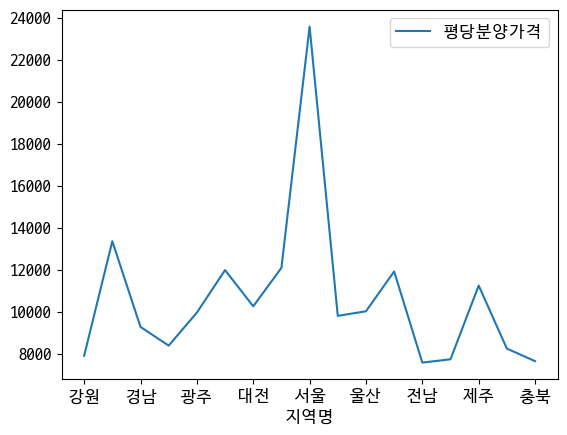

In [54]:
# 지역별 가장 큰 가격
g = last.groupby(['지역명'])['평당분양가격'].mean().to_frame()
g.plot()

<Axes: ylabel='지역명'>

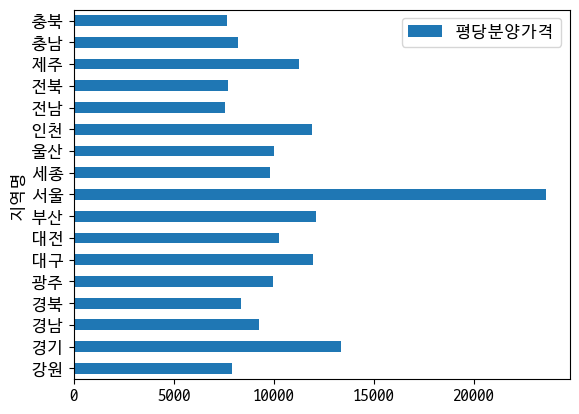

In [55]:
# g.plot.barh()
g.plot(kind='barh')

<Axes: xlabel='지역명'>

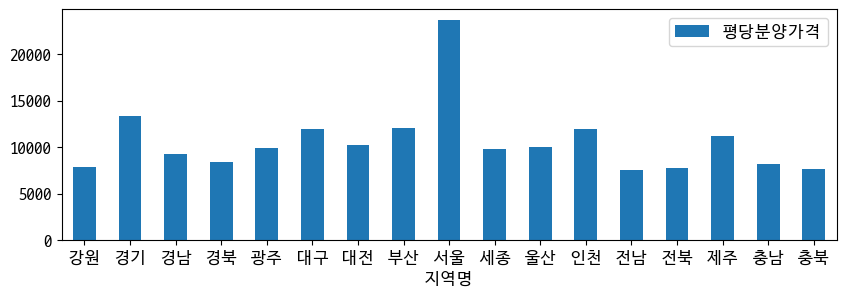

In [56]:
g.plot.bar(figsize=(10,3), rot = 0)

<Axes: xlabel='지역명'>

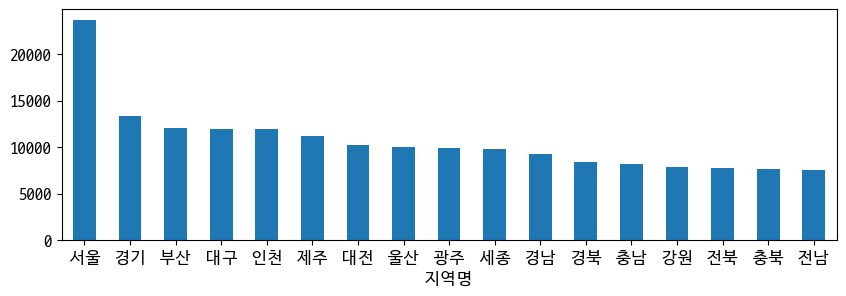

In [64]:
g = last.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)
g.plot.bar(rot=0, figsize=(10,3))

<Axes: xlabel='연도'>

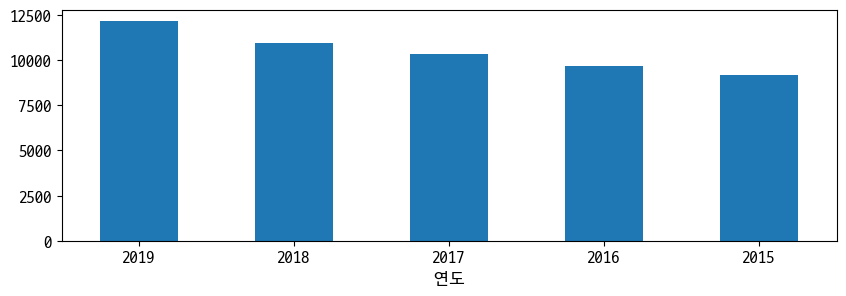

In [77]:
# 연도별 평당분양가격이 높은 순서대로
g = last.groupby(['연도'])['평당분양가격'].mean().sort_values(ascending=False)
g.plot.bar(rot=0, figsize=(10,3))

<Axes: >

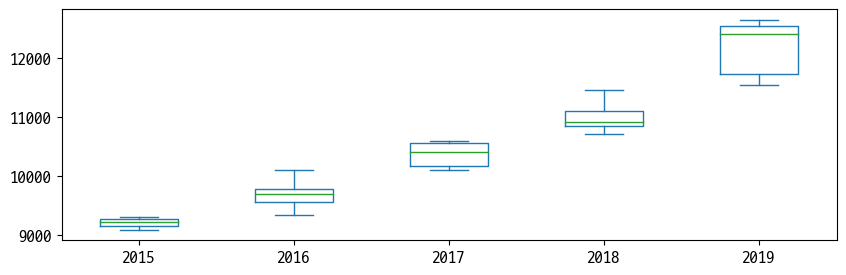

In [85]:
# 연도별 평당분양가격 박스플롯으로 작성 Transpond (T)로 연도를 COlumn으로 올려보냄
g=last.pivot_table(index='월', columns='연도', values='평당분양가격')
g.plot.box(figsize=(10,3))

<Axes: ylabel='평당분양가격'>

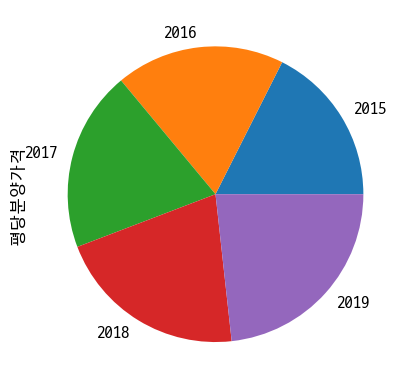

In [88]:
# 연도별 평당분양가격 파이 그래프, pie graph는 하나의 column 만 받음
g=last.pivot_table(index='연도', values='평당분양가격')
g['평당분양가격'].plot.pie()

In [96]:
import seaborn as sb
# * = list로 Data를 받음
sorted_df = last.sort_values('평당분양가격', ascending=False)

<Axes: xlabel='지역명', ylabel='평당분양가격'>

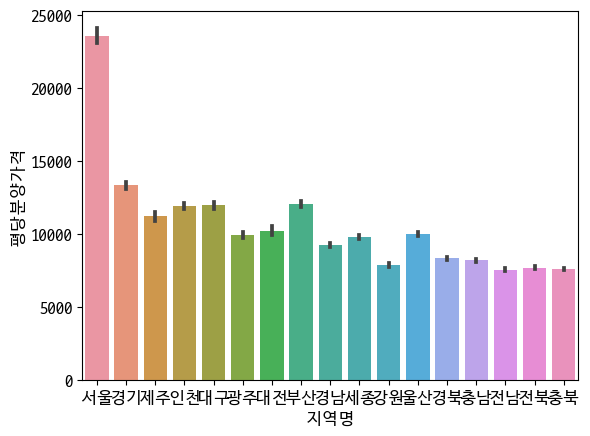

In [101]:
sb.barplot(data=sorted_df, x='지역명', y='평당분양가격')

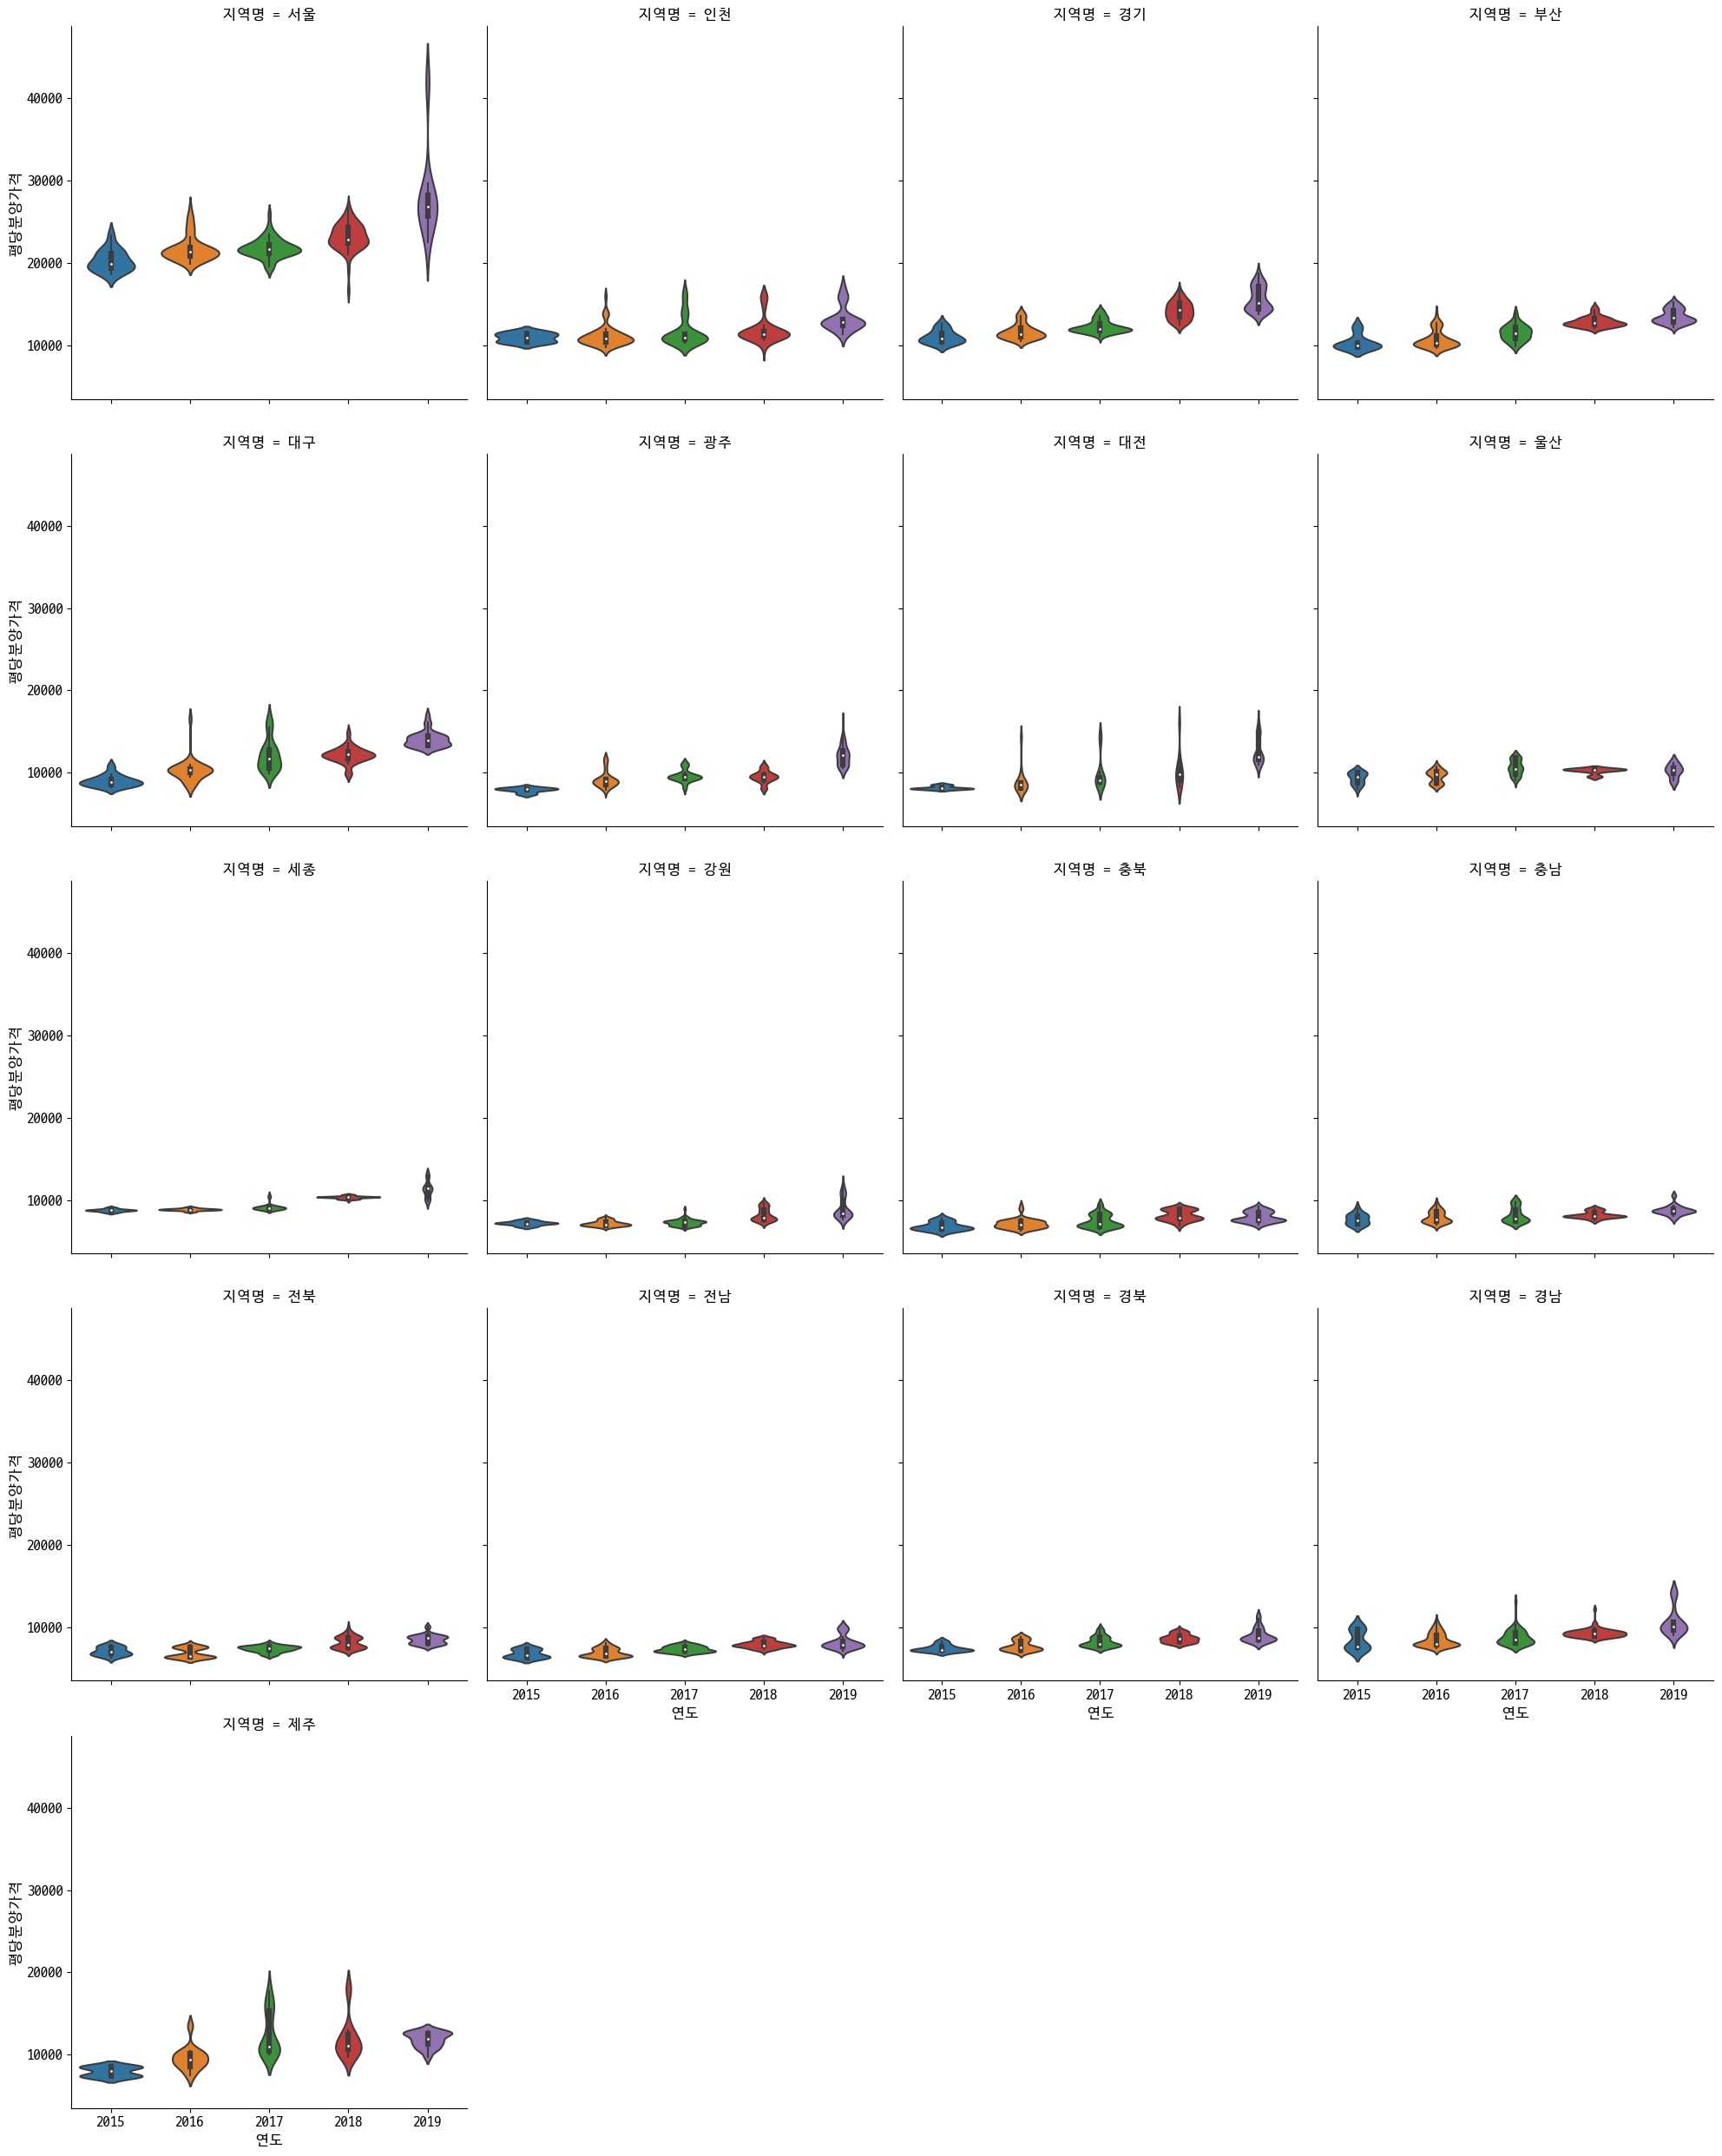

In [108]:
sb.catplot(data=last, x='연도', y='평당분양가격',kind='violin',col='지역명', col_wrap=4)

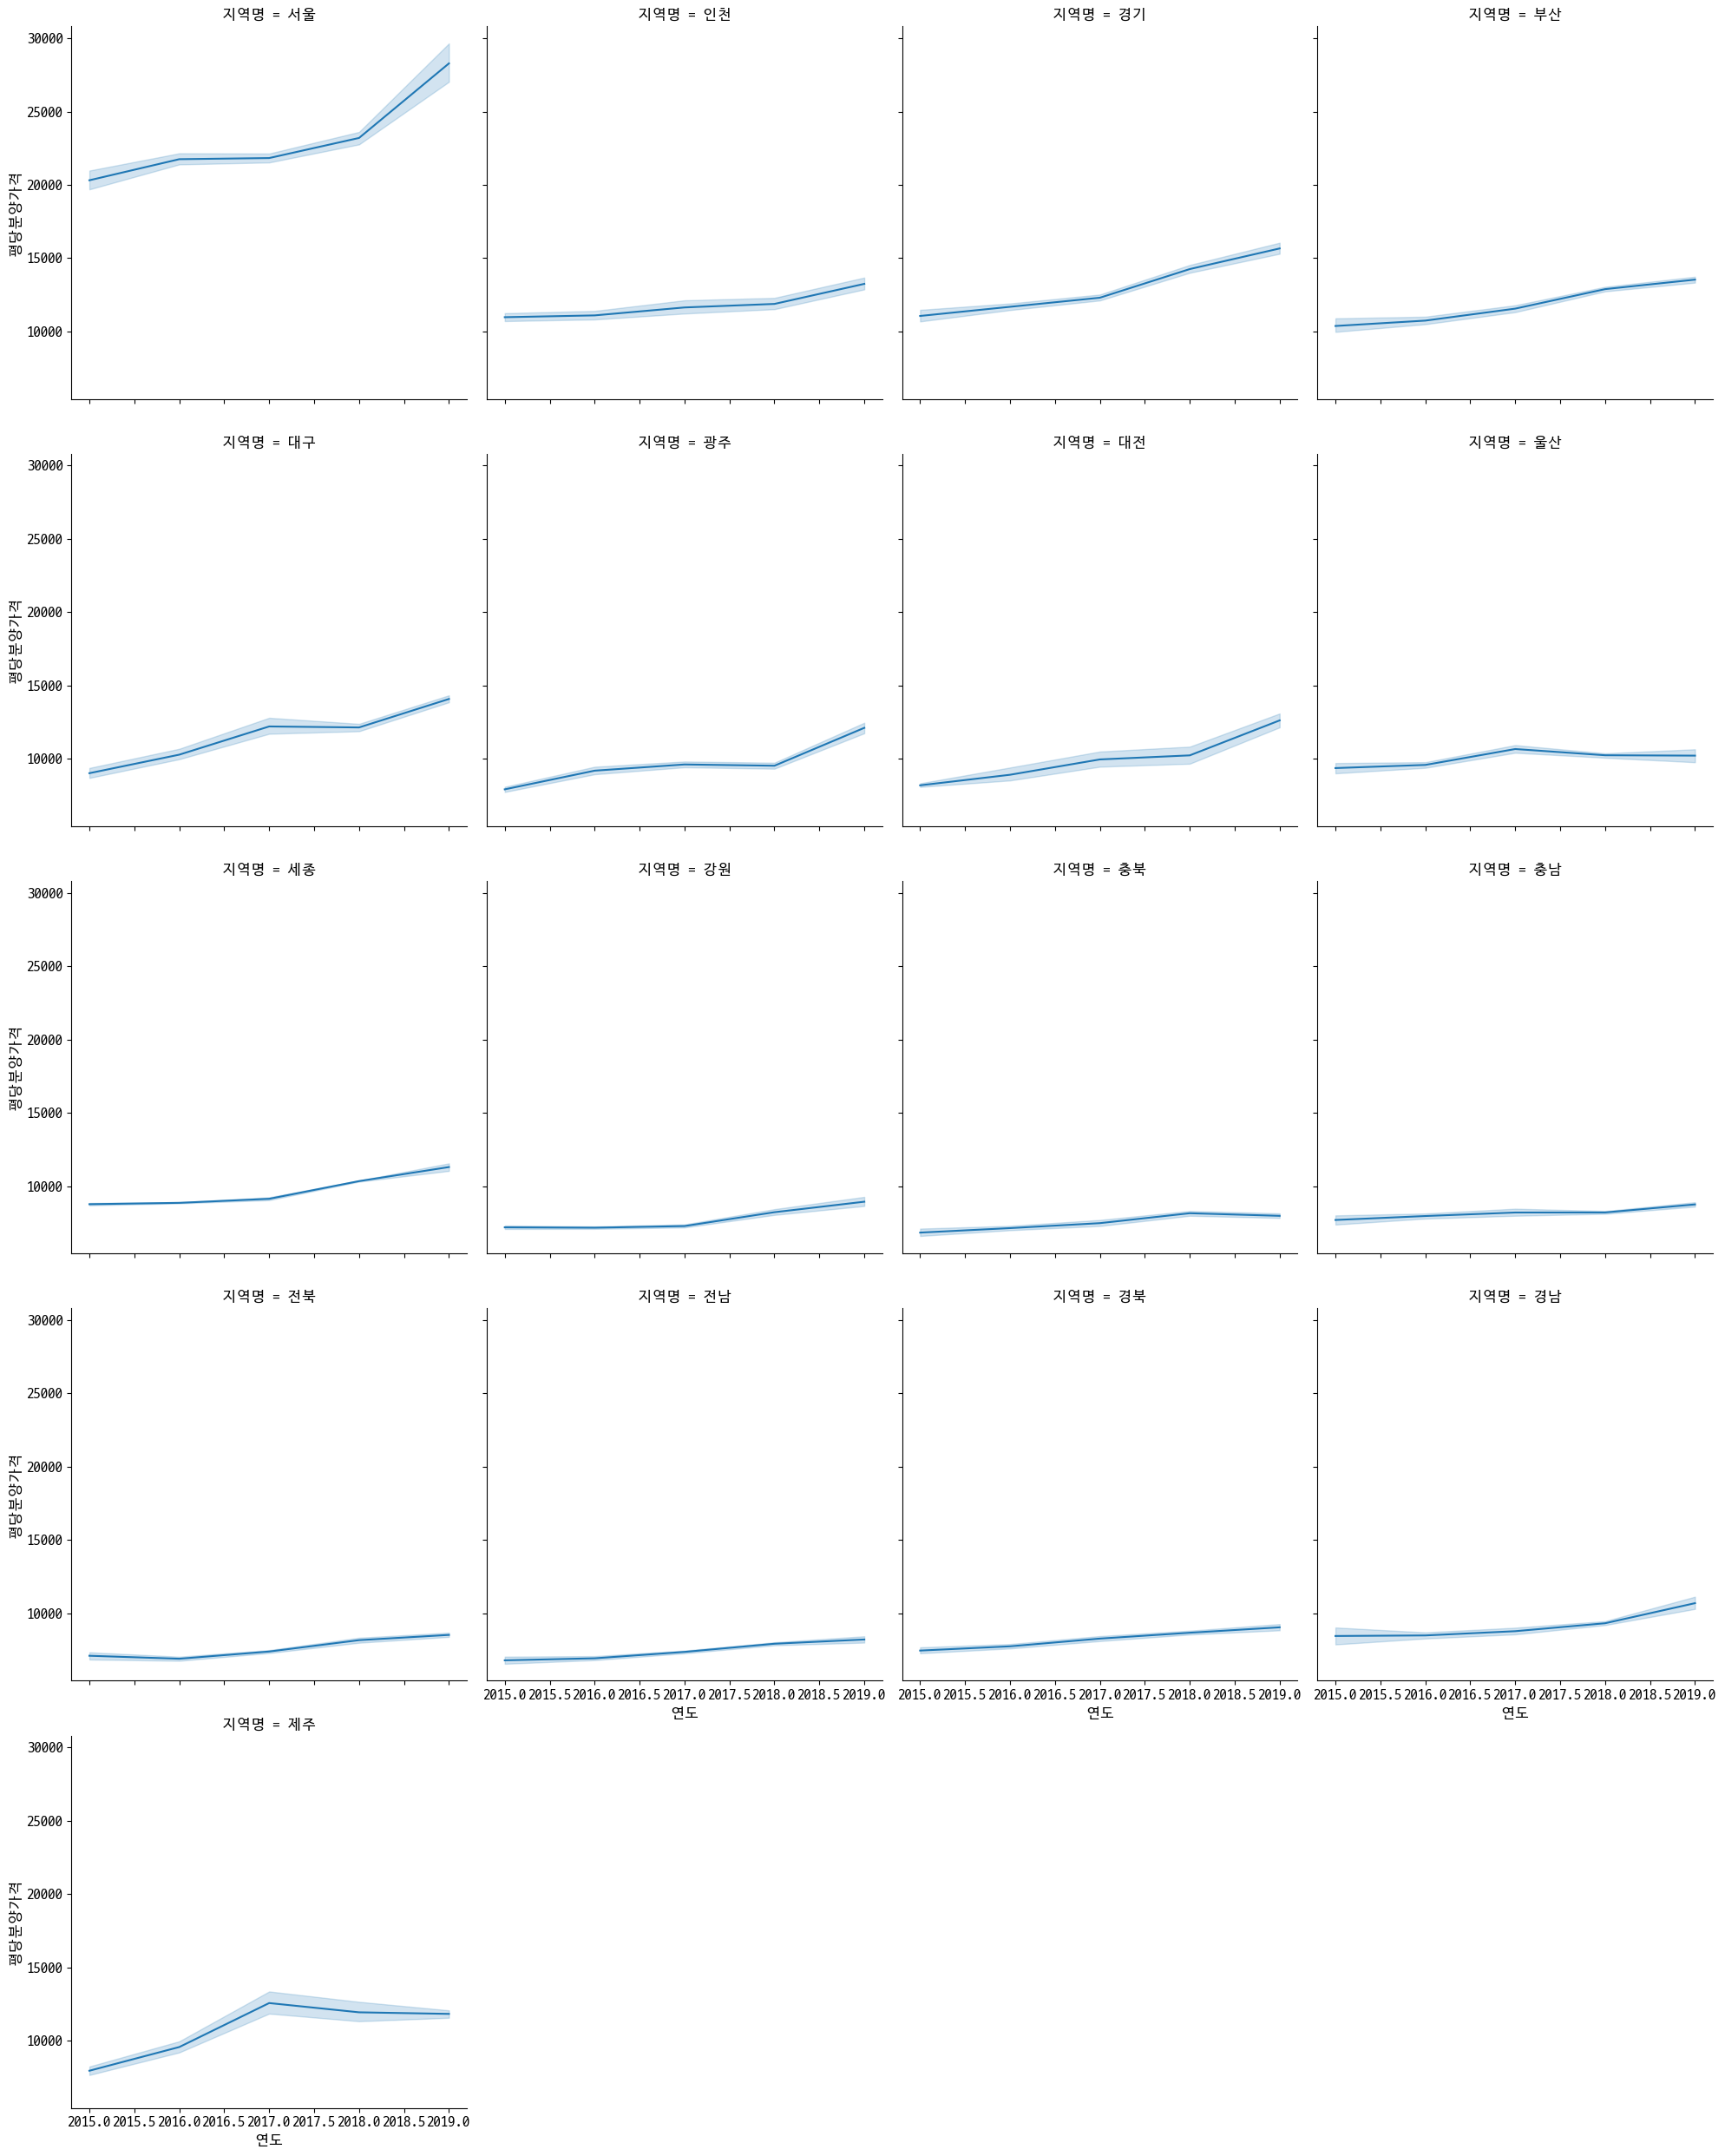

In [111]:
sb.relplot(data=last, x='연도', y='평당분양가격', kind='line', col='지역명', col_wrap=4)

<Axes: xlabel='연도', ylabel='평당분양가격'>

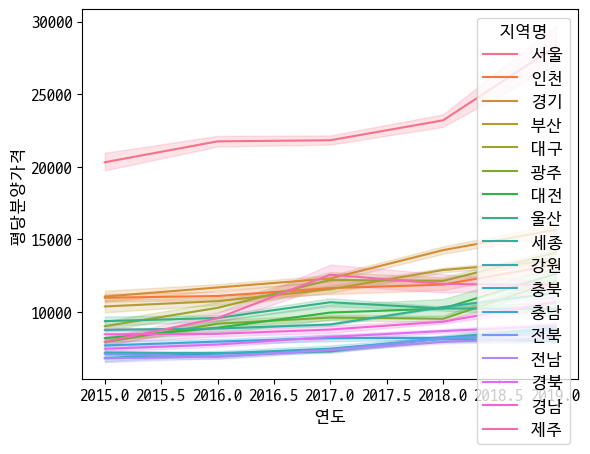

In [112]:
sb.lineplot(data=last, x='연도', y='평당분양가격', hue='지역명')

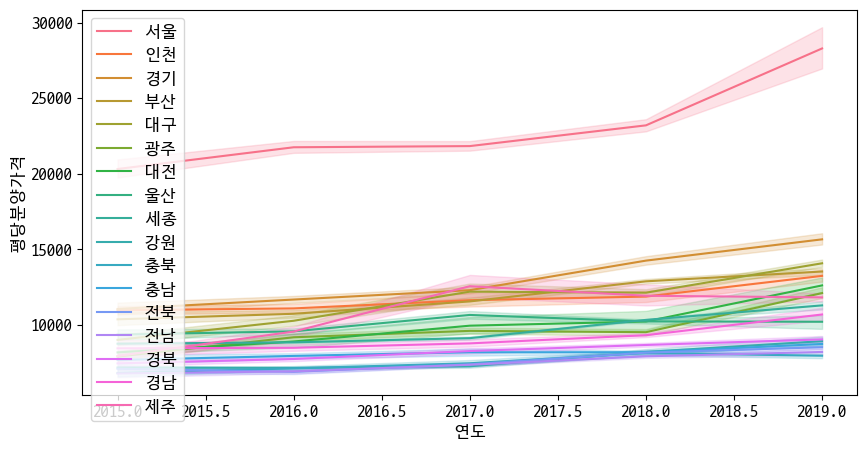

In [115]:
plt.figure(figsize=(10,5))
sb.lineplot(data=last, x='연도', y='평당분양가격', hue='지역명')
plt.legend(bbox_to_anchor=(0,1), loc=2)

In [120]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',20)

In [121]:
last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡이하
2,서울,2015,10,5882.0,19410.6,60㎡초과 85㎡이하
3,서울,2015,10,5721.0,18879.3,85㎡초과 102㎡이하
4,서울,2015,10,5879.0,19400.7,102㎡초과
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡이하
4332,제주,2019,12,3898.0,12863.4,60㎡초과 85㎡이하
4333,제주,2019,12,NaN,NaN,85㎡초과 102㎡이하


In [131]:
# melt를 이용하여 월별 데이터를 '기간' 컬럼으로 가격은 '평당분양가격'으로 처리 first_df_melt에 저장
first_melt_df = first.melt(id_vars = '지역',var_name = '기간', value_name = '평당분양가격' )
first.melt_df.head(3)

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080


In [132]:
first_melt_df['연도'] = first_melt_df['기간'].str.split('년').str[0].astype(str)

In [134]:
first_melt_df['월'] = first_melt_df['기간'].str.split('년').str[1].str.replace('월','').astype(str)

In [135]:
#last_df 전용면적에서 전체 및 데이터만 last_df_prepare로 저장
last_df_prepare = last[last['전용면적'] =='전체'].copy()

In [137]:
last_df_prepare.colums = ['지역명','연도','월','분양가격','평당분양가격','전용면적']

C:\Users\admin\AppData\Local\Temp\ipykernel_44480\2928767558.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  last_df_prepare.colums = ['지역명','연도','월','분양가격','평당분양가격','전용면적']


In [ ]:
Index(['지역명','연도','월','분양가격','평당분양가격','전용면적']